<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue"></span> Classification Algorithms</h1>



In [2]:


# NumPy and Pandas
import numpy as np
import pandas as pd

# Matplotlib, and remember to display plots in the notebook
from matplotlib import pyplot as plt
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

<span id="binary"></span>
# 1. Binary classification


In [3]:
raw_df = pd.read_csv('project_files/employee_data.csv')

print( raw_df.status.unique() )
raw_df.status.head()

['Left' 'Employed']


0        Left
1    Employed
2    Employed
3    Employed
4    Employed
Name: status, dtype: object

In [4]:
abt_df = pd.read_csv('analytical_base_table.csv')

print( abt_df.status.unique() )
abt_df.status.head()

[0 1]


0    0
1    1
2    1
3    1
4    1
Name: status, dtype: int64

<span id="conditional"></span>
# 2 - Toy example: noisy conditional



In [5]:
# Input feature
x = np.linspace(0, 1, 100)

# Noise
np.random.seed(555)
noise = np.random.uniform(-0.2,0.2, 100)

# Target variable
y = ((x + noise) > 0.5).astype(int)


In [6]:
# Reshape x into X
X = x.reshape(100,1)

Next, plot a **scatterplot** of the synthetic dataset.

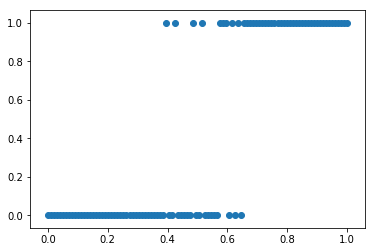

In [7]:
# Plot scatterplot of synthetic dataset
plt.scatter(X, y)

<span id="logistic"></span>
# 3. Logistic regression



In [8]:
# Import LinearRegression and LogisticRegression
from sklearn.linear_model import LinearRegression, LogisticRegression

Fit a linear model, make predictions, and plot them.

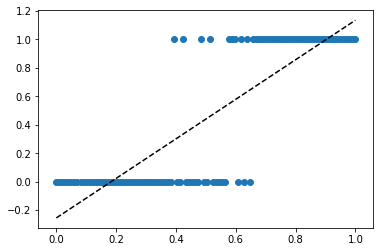

In [9]:
# Linear model
model = LinearRegression()
model.fit(X, y)

# Plot dataset and predictions
plt.scatter(X, y)
plt.plot(X, model.predict(X), 'k--')
plt.show()

In [10]:
# Logistic regression
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
# predict()
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
# # predict_proba()
pred = model.predict_proba(X[:10])

pred

array([[0.89323552, 0.10676448],
       [0.88947376, 0.11052624],
       [0.88559644, 0.11440356],
       [0.88160121, 0.11839879],
       [0.87748575, 0.12251425],
       [0.87324782, 0.12675218],
       [0.86888519, 0.13111481],
       [0.86439572, 0.13560428],
       [0.85977734, 0.14022266],
       [0.85502804, 0.14497196]])

In [13]:
# Class probabilities for first observation
pred[0]

array([0.89323552, 0.10676448])

In [14]:
# Positive class probability for first observation
pred[0][1]

0.10676448264067613

In [15]:
# Just get the second value for each prediction
pred = [p[1] for p in pred]

pred

[0.10676448264067613,
 0.11052623680433005,
 0.11440355742582128,
 0.11839879099901449,
 0.12251424555610411,
 0.12675218324295856,
 0.1311148125280929,
 0.13560428005260655,
 0.14022266213141368,
 0.1449719559193139]

Ok, let's fit and plot the logistic regression model.

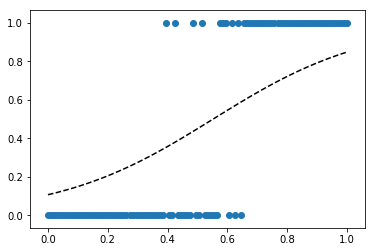

In [15]:
# Logistic regression
model = LogisticRegression()
model.fit(X, y)

# Predict probabilities
pred = model.predict_proba(X)

# Just get the second value (positive class) for each prediction
pred = [p[1] for p in pred]

# Plot dataset and predictions
plt.scatter(X, y)
plt.plot(X, pred, 'k--')
plt.show()

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold;">
[Back to Contents](#toc)
</p>

<span id="regularized-logistic"></span>
# 4. Regularized logistic regression



In [16]:
def fit_and_plot_classifier(clf):
    # Fit model
    clf.fit(X, y)
    
    # Predict and take second value of each prediction
    pred = clf.predict_proba(X)
    pred = [p[1] for p in pred]
    
    # Plot
    plt.scatter(X, y)
    plt.plot(X, pred, 'k--')
    plt.show()
    
    # Return fitted model and predictions
    return clf, pred

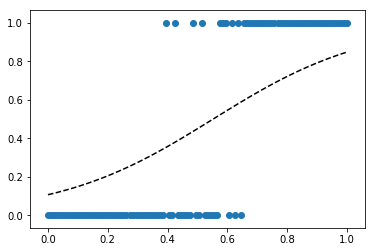

In [17]:
# Logistic regression
clf, pred = fit_and_plot_classifier(LogisticRegression())

Make the penalty **4 times stronger**.

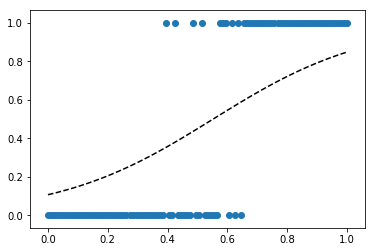

In [18]:
# Standard strength
clf, pred = fit_and_plot_classifier(LogisticRegression(C=1))

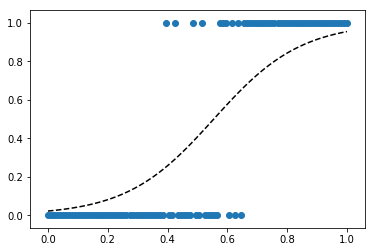

In [19]:
# Less regularization
clf, pred = fit_and_plot_classifier(LogisticRegression(C=4))

Next, make the penalty **4 times weaker**.

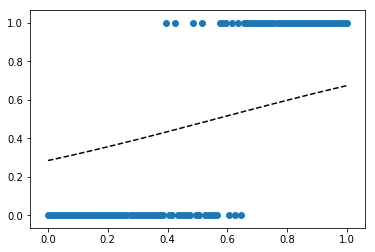

In [20]:
# More regularization
clf, pred = fit_and_plot_classifier(LogisticRegression(C=0.25))

To basically remove regularization, bump <code style="color:steelblue">C</code> way up.

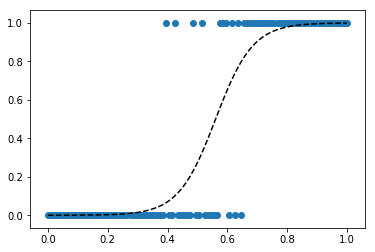

In [22]:
# Basically no regularization
clf, pred = fit_and_plot_classifier(LogisticRegression(C=10000))

Set the **penalty type** to use $L_1$ regularization.

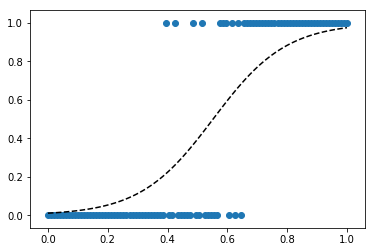

In [23]:
# L1 regularization
clf, pred = fit_and_plot_classifier(LogisticRegression(penalty='l1'))

Initialize $L_1$-regularized and $L_2$-regularized logistic regression **separately** and **explicitly**.

In [24]:
# L1-regularized logistic regression
l1 = LogisticRegression(penalty='l1', random_state=123)

# L2-regularized logistic regression
l2 = LogisticRegression(penalty='l2', random_state=123)

Finally, use $L_1$-regularization with a 4 times weaker penalty.

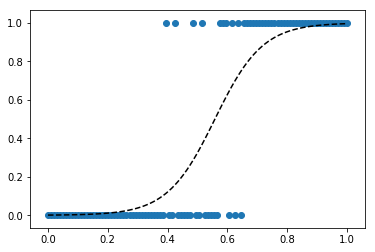

In [25]:
# L1 regularization with weaker penalty
clf, pred = fit_and_plot_classifier(LogisticRegression(penalty='l1', C=4))

<span id="tree-ensembles"></span>
# 5. Tree ensemble algorithms



In [26]:
from sklearn.ensemble import RandomForestClassifier

Apply it to this toy problem.

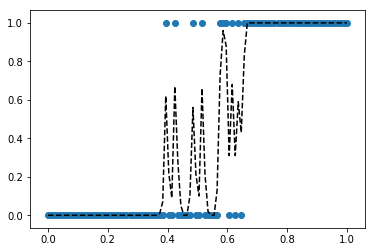

In [27]:
# Random forest classifier
clf, pred = fit_and_plot_classifier(RandomForestClassifier(n_estimators=100))

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

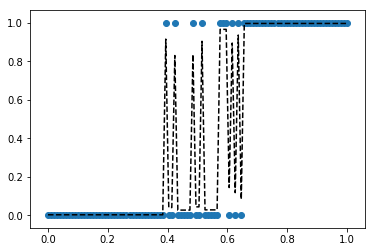

In [29]:
# Random forest classifier
clf, pred = fit_and_plot_classifier(GradientBoostingClassifier(n_estimators=100))